In [98]:
# İlgili kütüphaneler import edilir

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [99]:
# Veri setini okumak
df = pd.read_csv("TV.csv",delimiter=",")
df

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3
...,...,...,...,...,...,...,...
907,SONY,Full HD LED,43,44999,57900,Linux,4.4
908,SONY,Full HD LED,40,41499,51900,Linux,4.6
909,SONY,Ultra HD LED,65,149990,184990,Linux,4.3
910,SONY,HD LED,32,32900,32900,Linux,4.4


In [100]:
print(df.columns)

Index(['Brand', 'Resolution', 'Size ', 'Selling Price', 'Original Price',
       'Operating System', 'Rating'],
      dtype='object')


In [101]:
df.Brand.unique()

array(['TOSHIBA', 'TCL ', 'realme ', 'Mi ', 'OnePlus', 'Hisense', 'LG ',
       'MarQ by Flipkart', 'iFFALCON by TCL', 'Coocaa ', 'SAMSUNG',
       'Infinix', 'Vu', 'Nokia ', 'Thomson', 'SONY ', 'KODAK ',
       'MOTOROLA', 'PHILIPS', 'Acer', 'Blaupunkt', 'Adsun', 'T-Series',
       'Panasonic', 'Micromax', 'Sansui ', 'Croma ', 'Candes ', 'Dyanora',
       'Haier ', 'Onida', 'RGL ', 'Lloyd ', 'LumX ', 'Onix ', 'IMPEX ',
       'BPL ', 'CloudWalker', 'Oxygen ', 'Power Guard', 'Akai ', 'VG ',
       'Sun King', 'Compaq ', 'HUIDI ', 'Intex ', 'DETEL ', 'JVC',
       'G-TEN ', 'Skyworth', 'Maser ', 'Sanyo ', 'MURPHY ', 'Samsung',
       'Dektron', 'Sharp ', 'KRISONS', 'Weston ', 'AISEN  '], dtype=object)

In [102]:
df.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

In [103]:
most_common_os = df['Operating System'].mode()[0]
df['Operating System'].fillna(most_common_os, inplace=True)

In [104]:
# En sık tekrarlanan değeri bul
most_common_rating = df['Rating'].mode()[0]

# Eksik değerleri en sık tekrarlanan değer ile doldur
df['Rating'].fillna(most_common_rating, inplace=True)

In [105]:
df.isnull().sum()

Brand               0
Resolution          0
Size                0
Selling Price       0
Original Price      0
Operating System    0
Rating              0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             912 non-null    object 
 1   Resolution        912 non-null    object 
 2   Size              912 non-null    int64  
 3   Selling Price     912 non-null    int64  
 4   Original Price    912 non-null    int64  
 5   Operating System  912 non-null    object 
 6   Rating            912 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 50.0+ KB


In [107]:
from sklearn.preprocessing import LabelEncoder

# Nesne veri türüne sahip sütunları seçme
object_columns = ['Brand', 'Resolution', 'Operating System']

# LabelEncoder nesnelerini depolamak için bir sözlük oluşturma
le_dict = {}

# Her bir nesne sütunu için LabelEncoder uygulama
for column in object_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    le_dict[column] = le

# Dönüştürülmüş DataFrame'i gösterme
df


,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,52,4,55,37999,54990,5,4.3
1,51,3,55,52999,129990,0,4.4
2,58,1,32,13999,17999,0,4.3
3,31,1,32,14999,19999,0,4.4
4,58,1,32,12999,21999,0,4.3
...,...,...,...,...,...,...,...
907,43,0,43,44999,57900,3,4.4
908,43,0,40,41499,51900,3,4.6
909,43,4,65,149990,184990,3,4.3
910,43,1,32,32900,32900,3,4.4


In [108]:
# change column place

change_place = df.pop('Selling Price')
df['Selling Price'] = change_place
df.head()

,Brand,Resolution,Size,Original Price,Operating System,Rating,Selling Price
0,52,4,55,54990,5,4.3,37999
1,51,3,55,129990,0,4.4,52999
2,58,1,32,17999,0,4.3,13999
3,31,1,32,19999,0,4.4,14999
4,58,1,32,21999,0,4.3,12999


In [109]:
# Assuming you have your dataset X and target y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [110]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from yellowbrick.model_selection import FeatureImportances
# Veri setini Eğitim seti ve Test seti olarak ayırma

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [111]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [112]:
df

,Brand,Resolution,Size,Original Price,Operating System,Rating,Selling Price
0,52,4,55,54990,5,4.3,37999
1,51,3,55,129990,0,4.4,52999
2,58,1,32,17999,0,4.3,13999
3,31,1,32,19999,0,4.4,14999
4,58,1,32,21999,0,4.3,12999
...,...,...,...,...,...,...,...
907,43,0,43,57900,3,4.4,44999
908,43,0,40,51900,3,4.6,41499
909,43,4,65,184990,3,4.3,149990
910,43,1,32,32900,3,4.4,32900


FeatureImportances(ax=<Axes: >,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   topn=6)

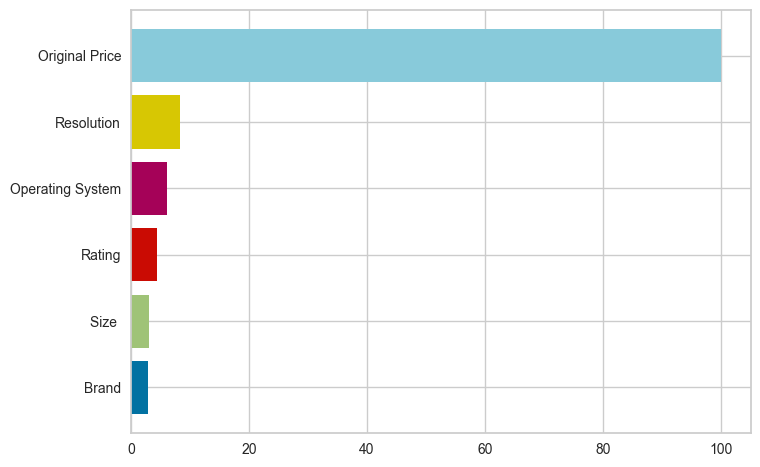

In [113]:
from xgboost import XGBRegressor
from yellowbrick.model_selection import FeatureImportances

column_names = x_train.columns.tolist()

regressor = XGBRegressor()

viz = FeatureImportances(regressor, topn=6)

viz.fit(x_train, y_train)

In [114]:
# Özellik isimlerini alın
feature_names = viz.features_

# İlk 6 özelliğin isimlerini alın
top_6_feature_names = feature_names[:6]

print(top_6_feature_names)

['Brand' 'Size ' 'Rating' 'Operating System' 'Resolution' 'Original Price']


In [115]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [116]:
#Test verilerini kullanarak çıktıyı tahmin et
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

In [117]:
y_pred_df = pd.DataFrame(data=y_pred,columns=["Tahmini_Sonuc"])

In [118]:
import pandas as pd

# Model ile tahmin yapma
y_pred = model.predict(x_test)

# y_pred ve y_test verilerini DataFrame'e dönüştürme
y_pred_df = pd.DataFrame(data=y_pred, columns=["Tahmini_Sonuc"])
y_test_df = pd.DataFrame(data=y_test.values, columns=["Gerçek_Sonuç"])

# y_test_df ve y_pred_df DataFrame'lerini birleştirme
karsılastırma_df = pd.concat([y_test_df, y_pred_df], axis=1)

# Sonuçların görüntülenmesi
karsılastırma_df

,Gerçek_Sonuç,Tahmini_Sonuc
0,9990,8305.978516
1,105000,110942.523438
2,41999,78412.054688
3,9999,12007.526367
4,36990,39410.988281
...,...,...
178,29999,39199.339844
179,15990,27933.734375
180,54999,98735.273438
181,13999,13823.744141


In [119]:
# Ortalama Mutlak Hata (Mean Absolute Error - MAE)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Ortalama Kare Hatası (Mean Squared Error - MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Kök Ortalama Kare Hatası (Root Mean Squared Error - RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 11293.845647092725
Mean Squared Error (MSE): 545647650.235231
Root Mean Squared Error (RMSE): 23359.102085380575


In [120]:
from sklearn.metrics import r2_score

x_train = r2_score(y_train, y_pred_train)
x_test = r2_score(y_test,y_pred)

print(f"Eğitim seti tahmin: {x_train}\n\nTest seti tahmin: {x_test}")

Eğitim seti tahmin: 0.9994828905564456

Test seti tahmin: 0.873497132489532


In [121]:
import joblib

# Modeli kaydet
joblib.dump(model, "xgb_model.joblib")

# Seçilen özellik isimlerini kaydet
joblib.dump(top_6_feature_names, "top_6_feature_names.joblib")

['top_6_feature_names.joblib']

In [122]:
import joblib

# Özellik isimlerini yükleme
top_6_feature_names = joblib.load("top_6_feature_names.joblib")
top_6_feature_names

array(['Brand', 'Size ', 'Rating', 'Operating System', 'Resolution',
       'Original Price'], dtype=object)

In [123]:
df.Brand.unique()

array([52, 51, 58, 31, 34, 17, 24, 29, 57,  9, 42, 19, 55, 33, 53, 43, 22,
       27, 38,  1,  5,  2, 50, 39, 32, 45, 10,  6, 13, 16, 35, 41, 25, 26,
       36, 18,  4,  7, 37, 40,  3, 54, 49,  8, 15, 20, 11, 21, 14, 48, 30,
       46, 28, 44, 12, 47, 23, 56,  0])

In [124]:
import pandas as pd

# LabelEncoder nesnelerini depolamak için bir sözlük oluşturma
le_dict = {
    'Brand': le_dict['Brand'],
    'Resolution': le_dict['Resolution'],
    'Operating System': le_dict['Operating System']
}

# Tersine çevrilmiş DataFrame oluşturma
df_inverse = df.copy()

# Her bir nesne sütunu için LabelEncoder'ı tersine çevirme
for column in object_columns:
    le = le_dict[column]
    df_inverse[column] = le.inverse_transform(df[column])

# Tersine çevrilmiş DataFrame'i gösterme
df_inverse

,Brand,Resolution,Size,Original Price,Operating System,Rating,Selling Price
0,TOSHIBA,Ultra HD LED,55,54990,VIDAA,4.3,37999
1,TCL,QLED Ultra HD,55,129990,Android,4.4,52999
2,realme,HD LED,32,17999,Android,4.3,13999
3,Mi,HD LED,32,19999,Android,4.4,14999
4,realme,HD LED,32,21999,Android,4.3,12999
...,...,...,...,...,...,...,...
907,SONY,Full HD LED,43,57900,Linux,4.4,44999
908,SONY,Full HD LED,40,51900,Linux,4.6,41499
909,SONY,Ultra HD LED,65,184990,Linux,4.3,149990
910,SONY,HD LED,32,32900,Linux,4.4,32900


In [125]:
sample_one = [{
    'Brand': 'TOSHIBA',
    'Resolution': 'Ultra HD LED',
    'Size': '55',
    'Operating System': 'VIDAA',
    'Rating': 4.3,
    'Original Price': 54990
}]

In [126]:
import pandas as pd
df_s = pd.DataFrame(sample_one)
df_s

,Brand,Resolution,Size,Operating System,Rating,Original Price
0,TOSHIBA,Ultra HD LED,55,VIDAA,4.3,54990


In [127]:
#scaler = joblib.load(open("scaler.joblib","rb"))
model = joblib.load(open("xgb_model.joblib","rb"))
#df_s = scaler.transform(df_s)

In [128]:
# model = joblib.load("model.joblib")